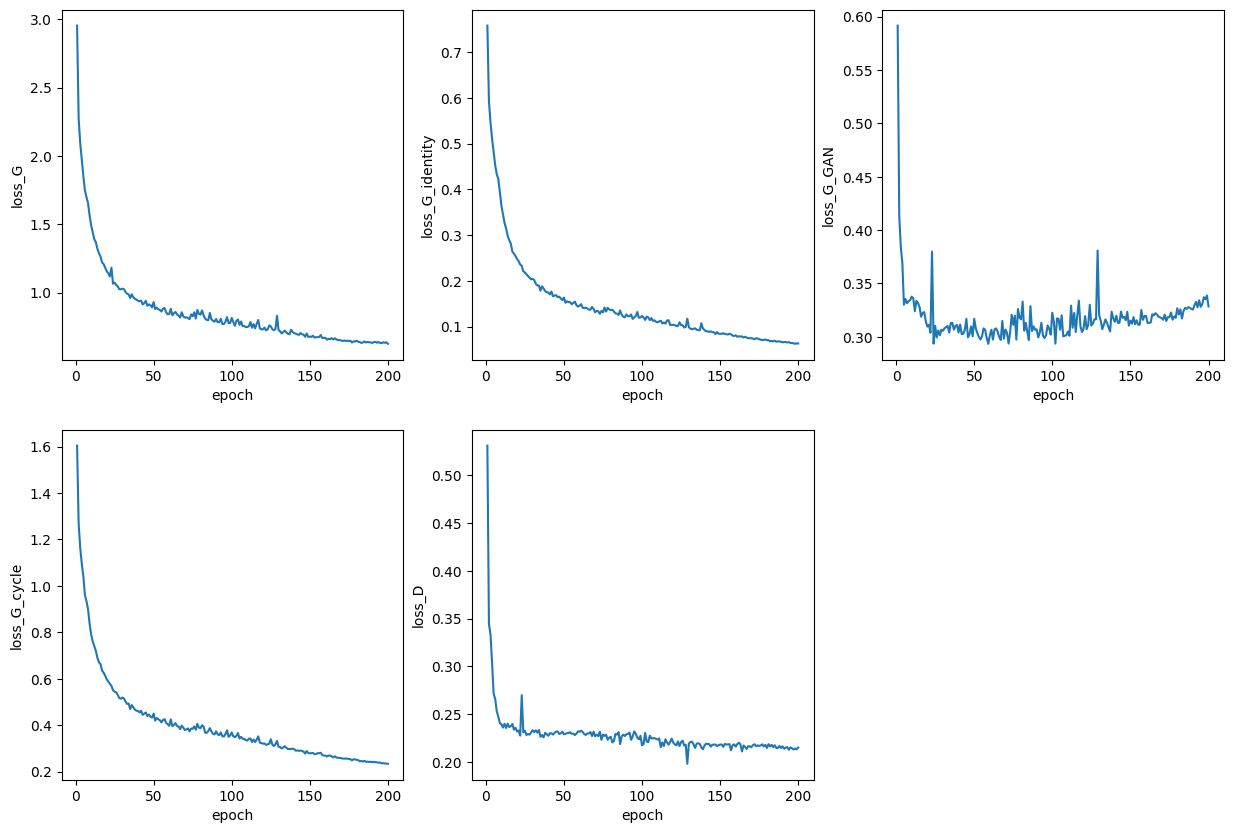

In [14]:
# show loss 
import matplotlib.pyplot as plt
import pandas as pd

loss = pd.read_csv('output/cyclegan/loss.csv')
x = loss['epoch'].tolist()

plt.figure(figsize=(15,10))
for i in range(0,5):
    label = loss.columns.tolist()[i+1]
    loss_ = loss[label].tolist()
    axis = plt.subplot(2,3,i+1)
    axis.set_xlabel('epoch')
    axis.set_ylabel(label)
    axis.plot(x,loss_)
plt.show()

ValueError: num must be 1 <= num <= 6, not 7

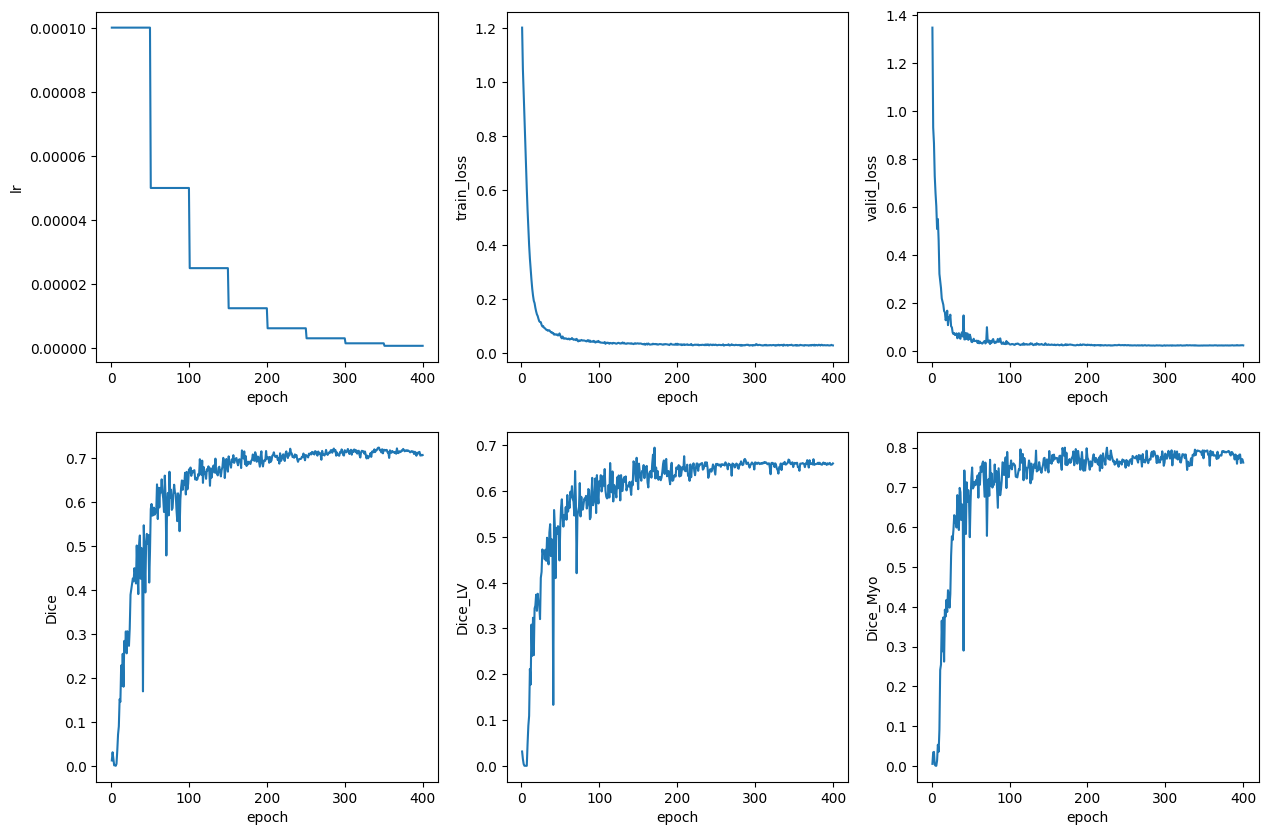

In [15]:
# 查看segmentation任务的情况
import matplotlib.pyplot as plt
import pandas as pd

loss = pd.read_csv('output/seg/loss.csv')
x = loss['epoch'].tolist()

plt.figure(figsize=(15,10))
for i in range(0,13):
    label = loss.columns.tolist()[i+1]
    loss_ = loss[label].tolist()
    axis = plt.subplot(2,3,i+1)
    axis.set_xlabel('epoch')
    axis.set_ylabel(label)
    axis.plot(x,loss_)
plt.show()

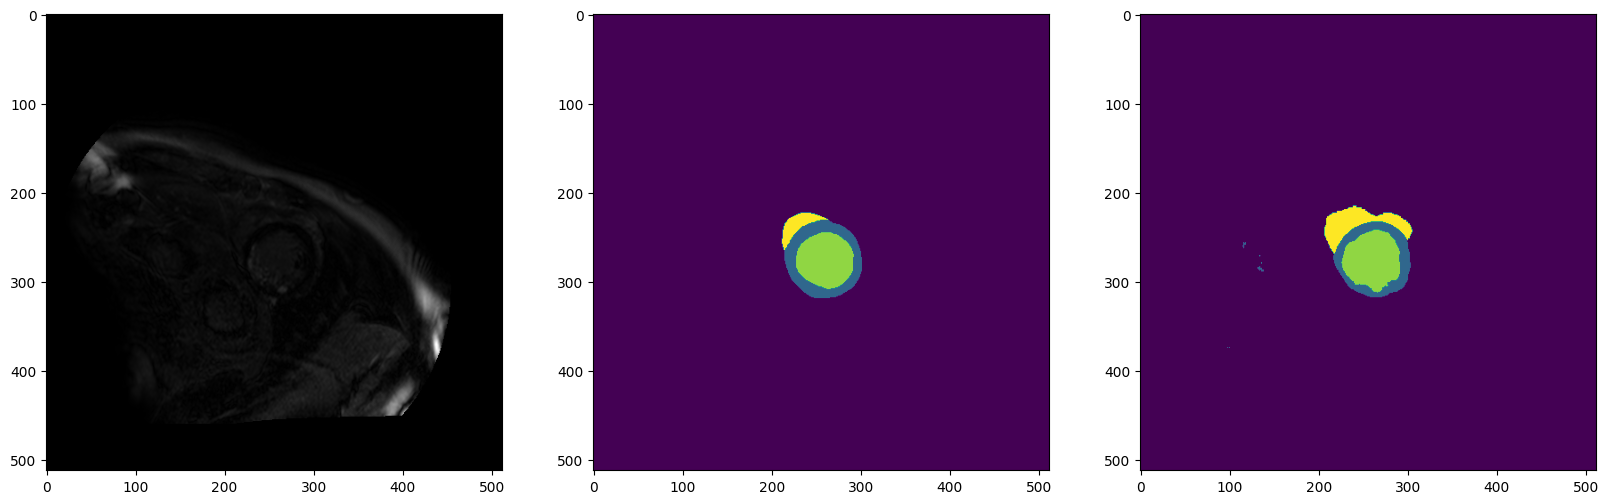

In [9]:
# 查看分割效果
# model
import torch
import numpy as np
from datasets import *
from models import MUnet
import torch.nn.functional as F
from utils import onehot2mask
import matplotlib.pyplot as plt
model = MUnet(1,4)
# load state dict
model.load_state_dict(torch.load('output/seg/best_dice.pth'))
model.eval()
# data (ues )
types = ['LGE']
data = load_image(str=types,paired_label=True)
index = 6
image = data['image'][index]
label = data['label'][index]
input = torch.tensor(image).unsqueeze(dim=0)
nor_i = minmax_normal(input).unsqueeze(dim=0)
# do test
predict = model(nor_i)
output = F.softmax(predict.detach(),dim=1).squeeze(dim=0)
remark = [[0.0],[200.0],[500.0],[600.0]]
label_ = onehot2mask(output,remark)
plt.figure(figsize=(20,20))
plt.subplot(1,3,1)
plt.imshow(image,cmap='gray')
plt.subplot(1,3,2)
plt.imshow(label)
plt.subplot(1,3,3)
plt.imshow(label_)